Average velocity error for 9.csv: 0.08341794605138979
Average position error for 9.csv: 0.009001962249580263
Average velocity error for 10.csv: 0.03632999626633308
Average position error for 10.csv: 0.004575012073183183
Average velocity error for 11.csv: 0.057732945624017755
Average position error for 11.csv: 0.007977871281132767
Average velocity error for 12.csv: 0.041739135189362966
Average position error for 12.csv: 0.003776026170068281
Average velocity error for 13.csv: 0.01460049533503081
Average position error for 13.csv: 0.001960198666933781
Average velocity error for 14.csv: 0.027095577292446247
Average position error for 14.csv: 0.0034520550676030676
Average velocity error for 17.csv: 0.3404363703890672
Average position error for 17.csv: 0.01597649534718189
Average velocity error for 18.csv: 0.13297304132279308
Average position error for 18.csv: 0.006887139368084222


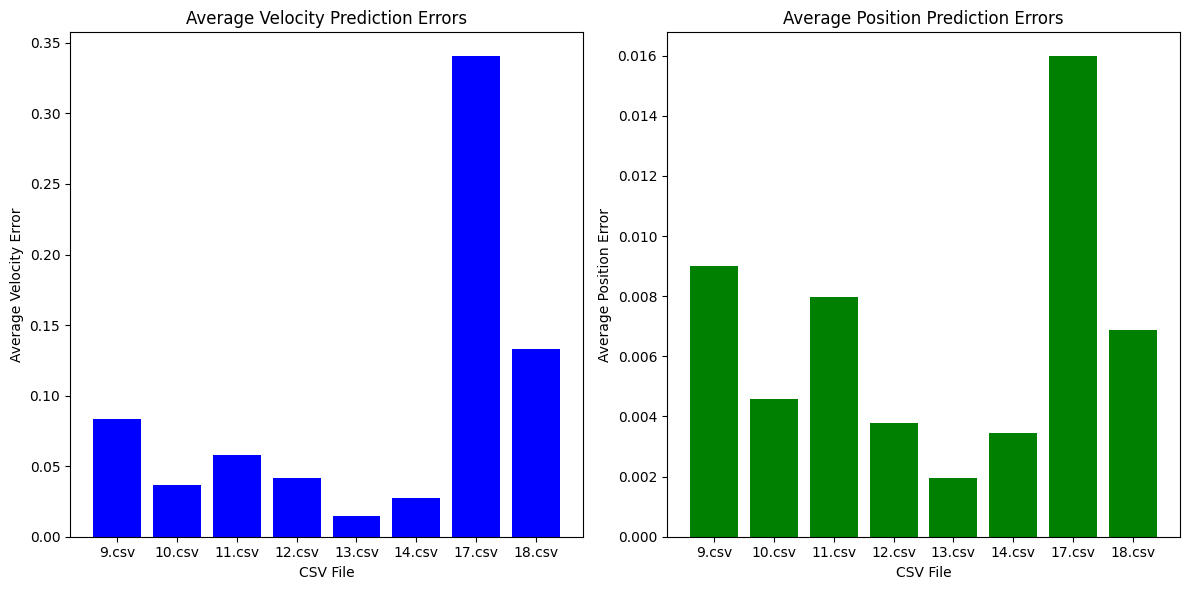

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directories containing the reference and prediction files
ref_dir = 'data/validation_exp/predictor/references'
pred_dir = 'data/validation_exp/predictor/prediction_hrz1'

# List of filenames (assuming they are just numbers with .csv extension as provided)
filenames = ['9.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '17.csv', '18.csv']

# Initialize lists to store average errors for each file for velocity and position
average_errors_velocity = []
average_errors_position = []

# Loop through each file name
for filename in filenames:
    # Construct full paths to the reference and prediction files
    ref_path = os.path.join(ref_dir, filename)
    pred_path = os.path.join(pred_dir, filename)
    
    # Read the data from CSV files
    ref_data = pd.read_csv(ref_path)
    pred_data = pd.read_csv(pred_path)
    # ref_data = ref_data[1:]
    # pred_data = pred_data[:len(ref_data)]
    # ref_data = ref_data.reset_index(drop=True)
    # ref_data['timestamp'] = ref_data['timestamp'] - ref_data['timestamp'][0]
    
    # Calculate errors for velocity and position
    error_velocity = np.abs(ref_data['DXL_Velocity'] - pred_data['predicted_velocity'])
    error_position = np.abs(ref_data['θ(t)'] - pred_data['predicted_position'])
    
    # Calculate the average error for the current file for both comparisons
    mean_error_velocity = error_velocity.mean()
    mean_error_position = error_position.mean()
    
    average_errors_velocity.append(mean_error_velocity)
    average_errors_position.append(mean_error_position)
    
    # Optionally print the mean error for each file and category
    print(f"Average velocity error for {filename}: {mean_error_velocity}")
    print(f"Average position error for {filename}: {mean_error_position}")

# Plotting the average errors for velocity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(filenames, average_errors_velocity, color='blue')
plt.xlabel('CSV File')
plt.ylabel('Average Velocity Error')
plt.title('Average Velocity Prediction Errors')

# Plotting the average errors for position
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(filenames, average_errors_position, color='green')
plt.xlabel('CSV File')
plt.ylabel('Average Position Error')
plt.title('Average Position Prediction Errors')

plt.tight_layout()
plt.show()

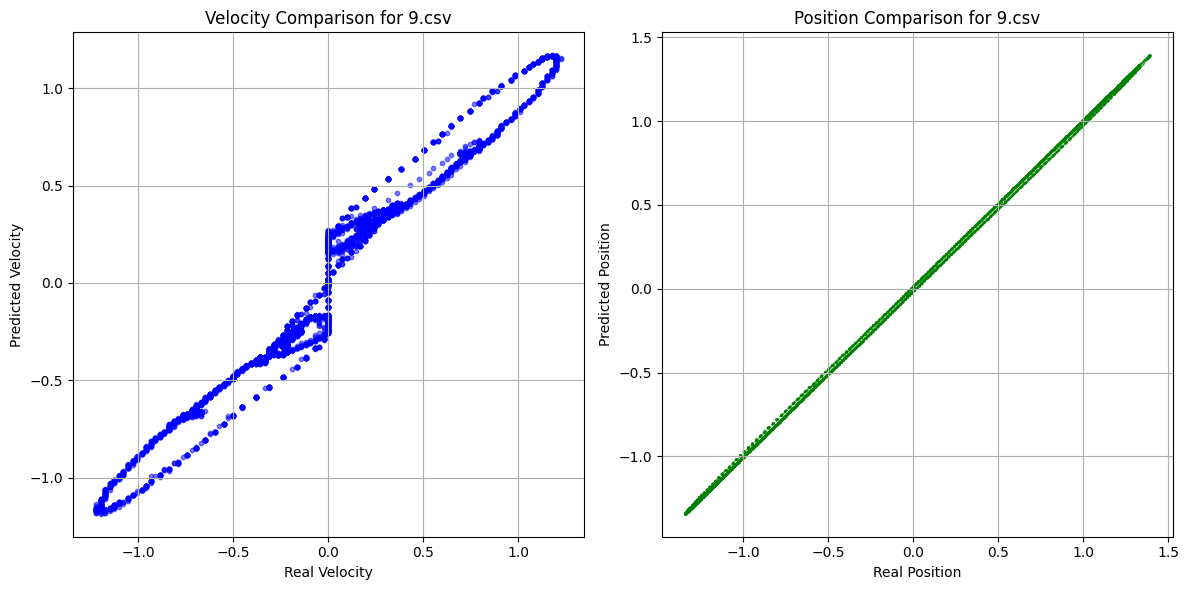

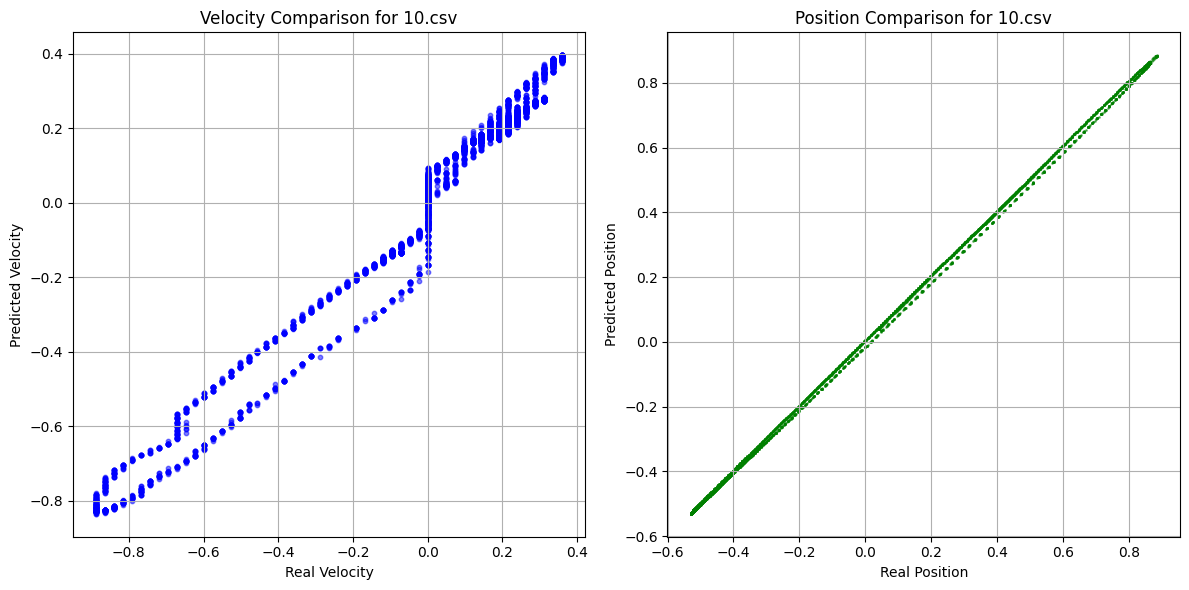

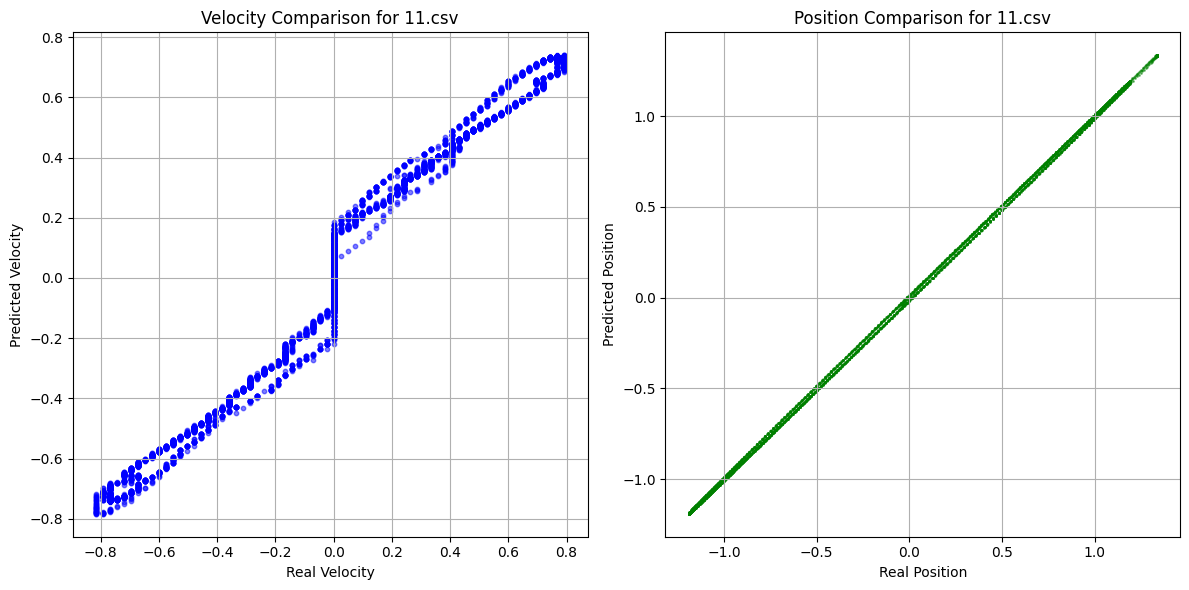

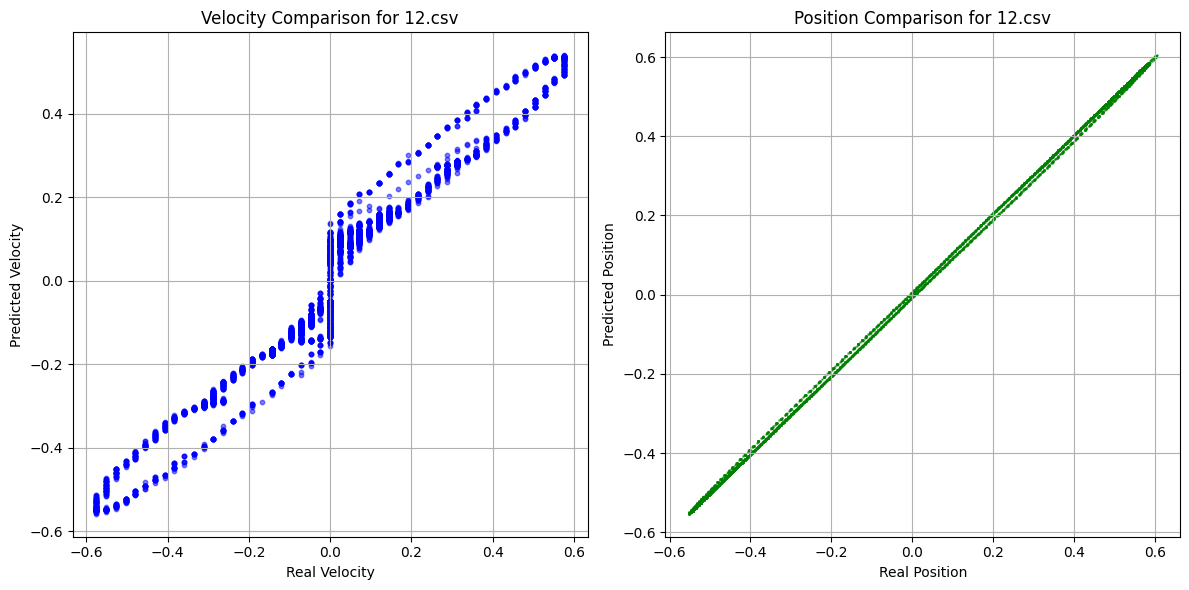

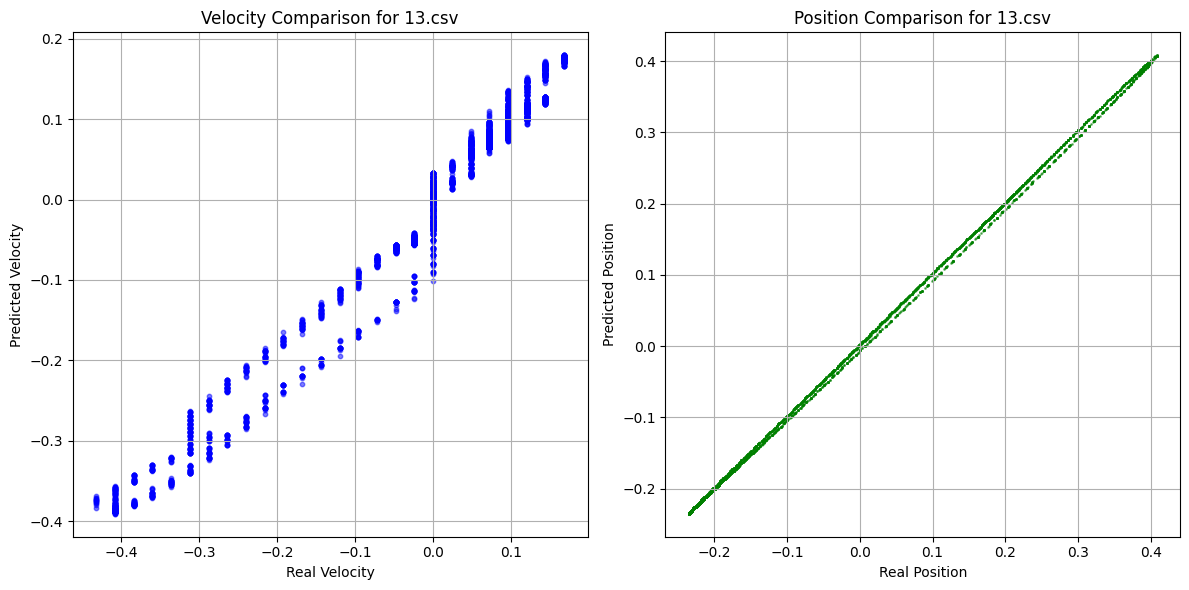

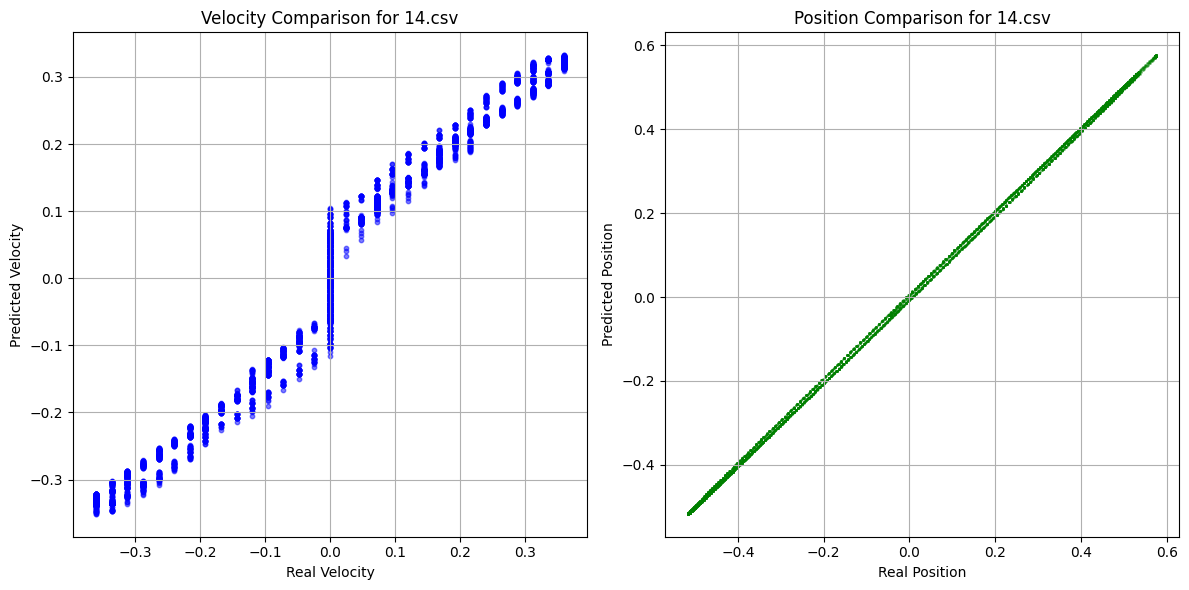

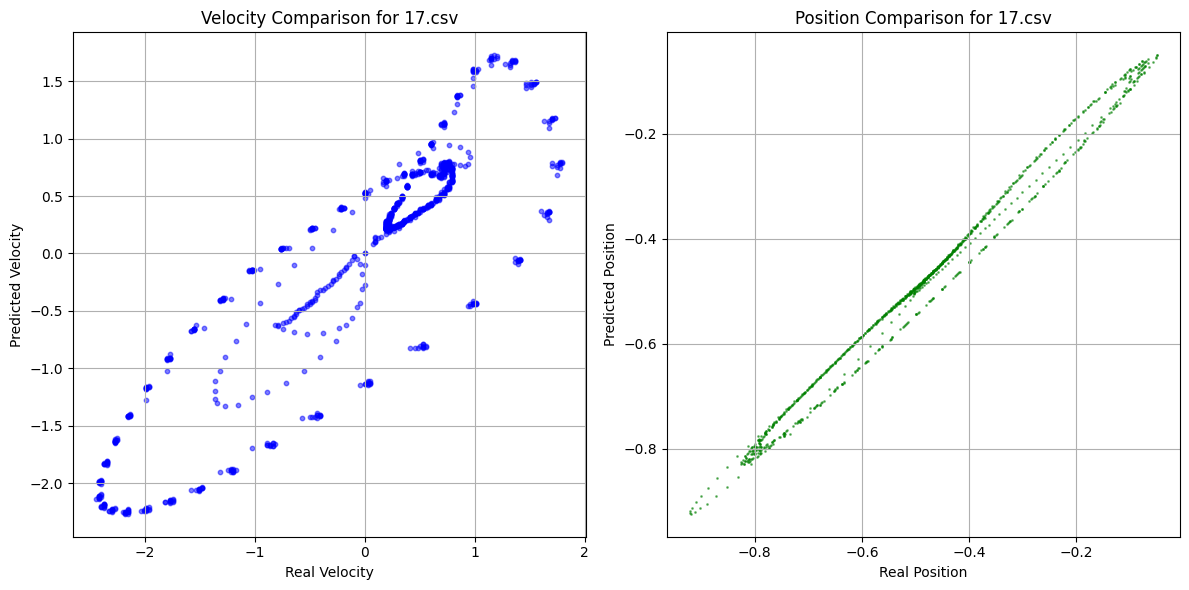

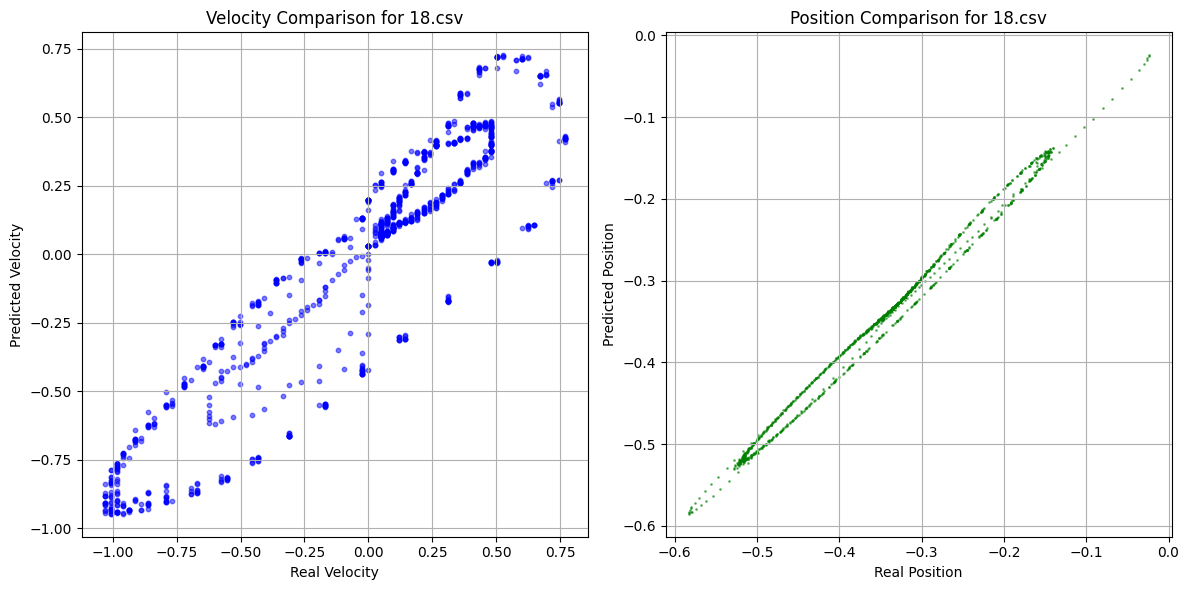

In [9]:
# Loop through each file name
for filename in filenames:
    # Construct full paths to the reference and prediction files
    ref_path = os.path.join(ref_dir, filename)
    pred_path = os.path.join(pred_dir, filename)
    
    # Read the data from CSV files
    ref_data = pd.read_csv(ref_path)
    pred_data = pd.read_csv(pred_path)
    
    # Prepare the data for plotting
    real_velocity = ref_data['DXL_Velocity']
    predicted_velocity = pred_data['predicted_velocity']
    real_position = ref_data['θ(t)']
    predicted_position = pred_data['predicted_position']

    # Create plots for velocity and position
    plt.figure(figsize=(12, 6))
    
    # Plot for velocity
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.scatter(real_velocity, predicted_velocity, color='blue', alpha=0.5, s=10)
    plt.xlabel('Real Velocity')
    plt.ylabel('Predicted Velocity')
    plt.title(f'Velocity Comparison for {filename}')
    plt.grid(True)

    # Plot for position
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.scatter(real_position, predicted_position, color='green', alpha=0.5, s=1)
    plt.xlabel('Real Position')
    plt.ylabel('Predicted Position')
    plt.title(f'Position Comparison for {filename}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

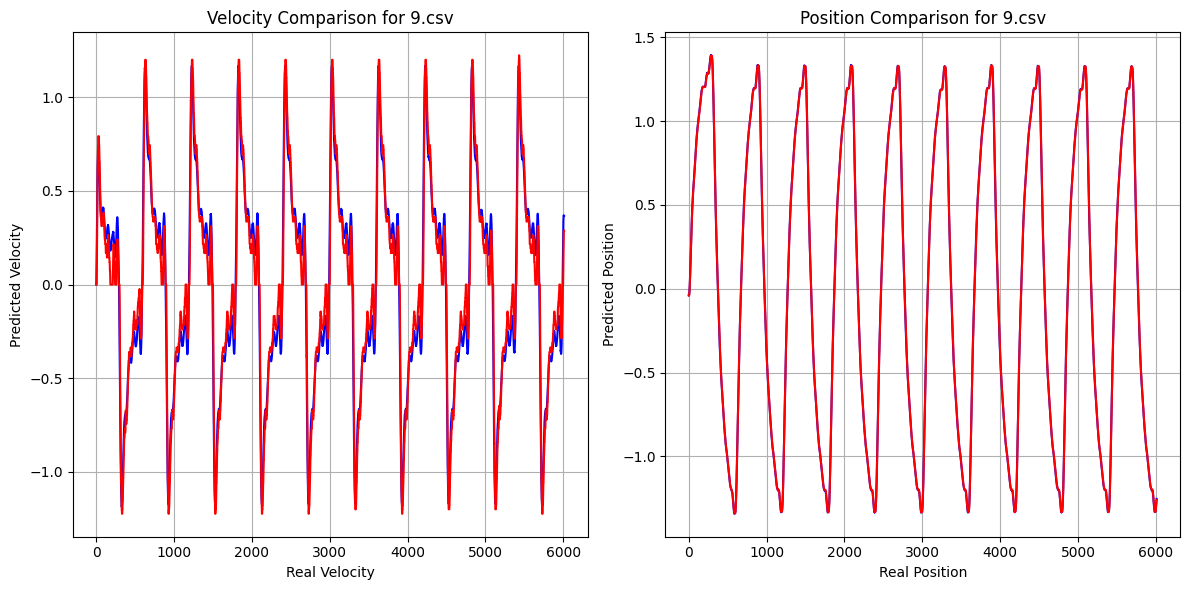

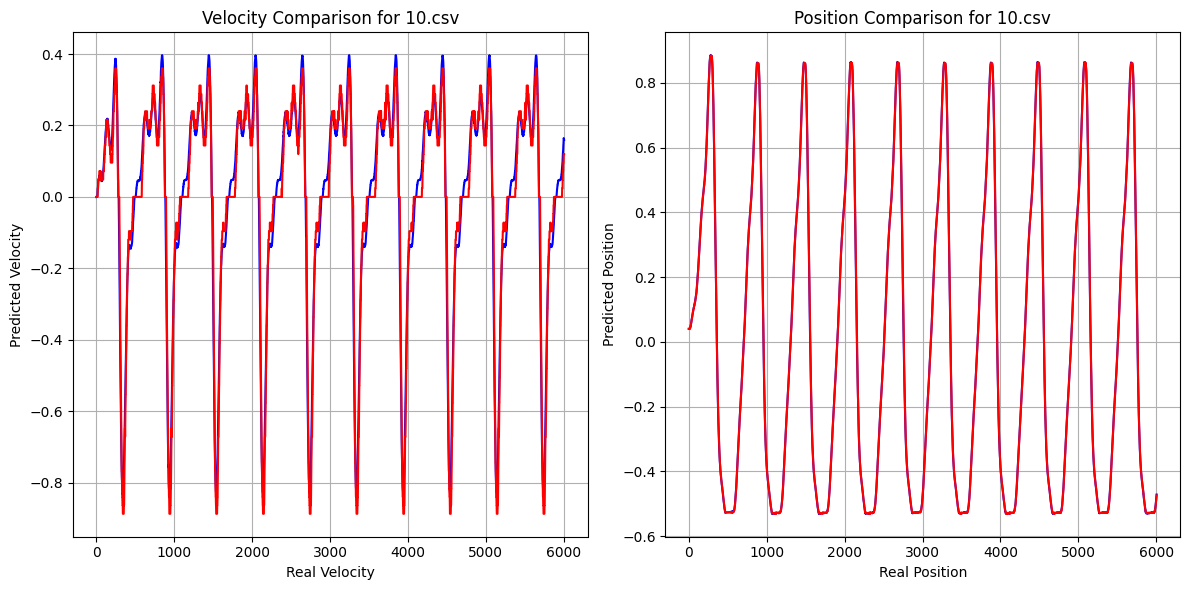

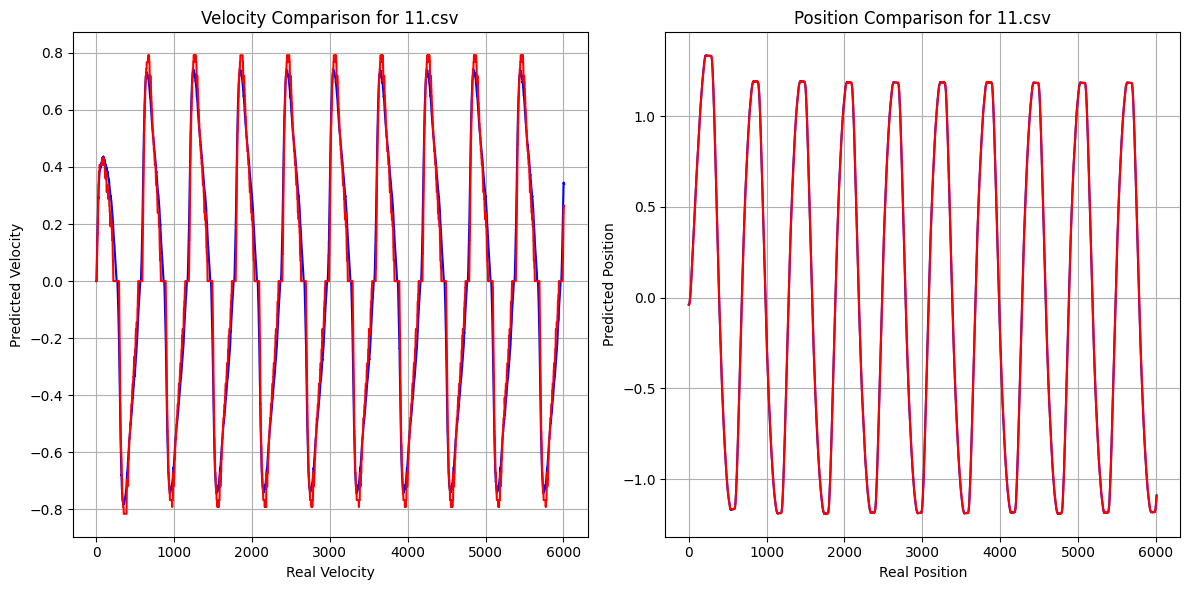

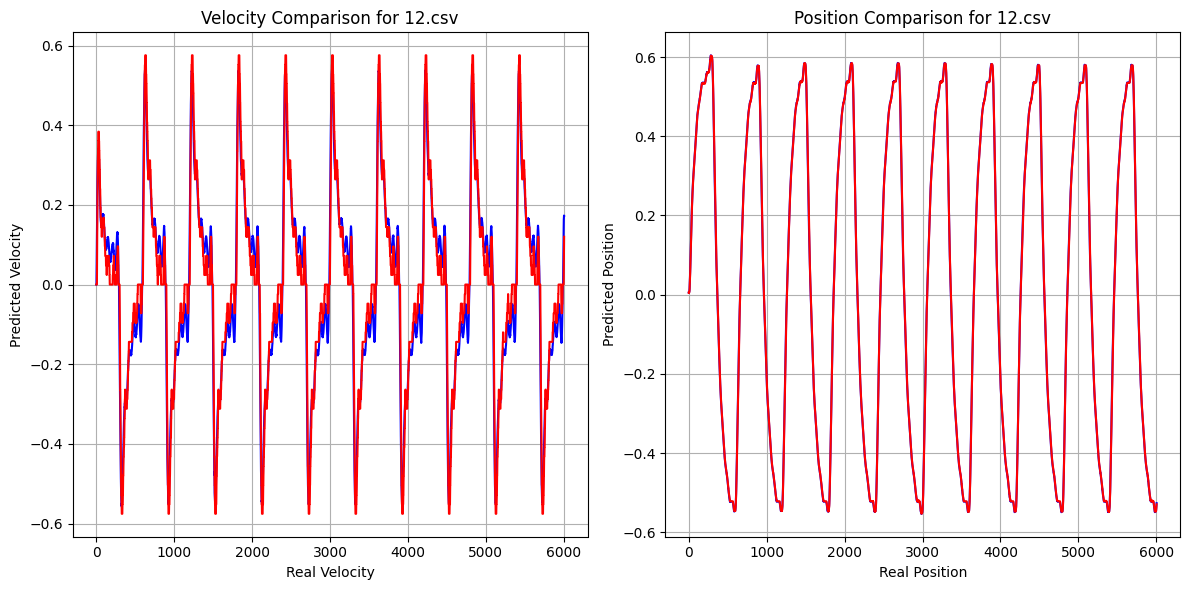

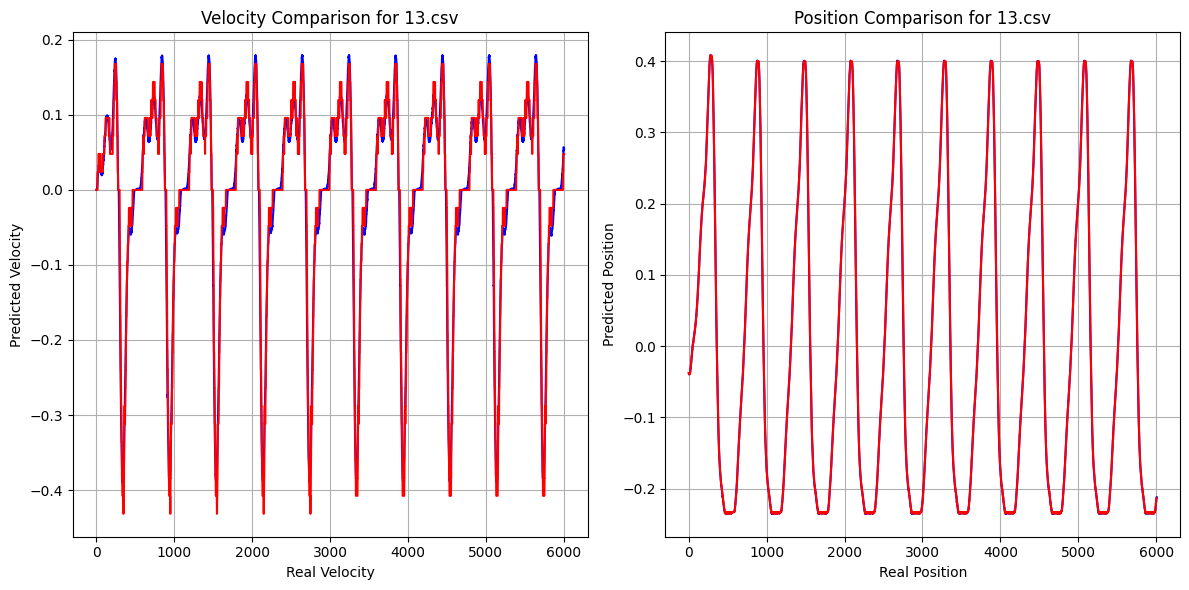

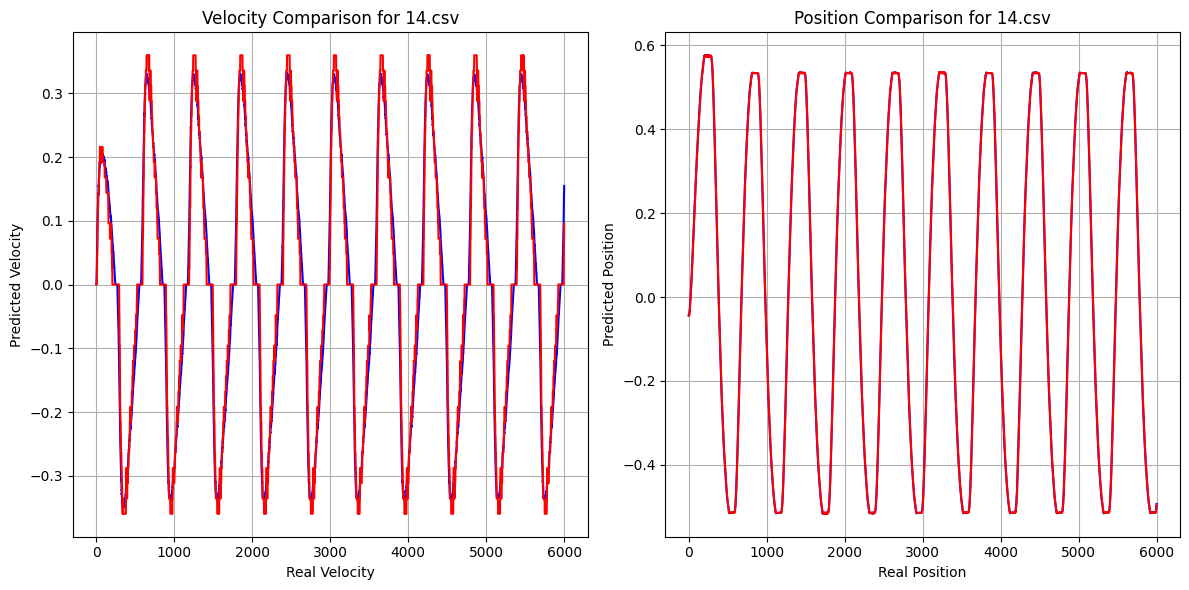

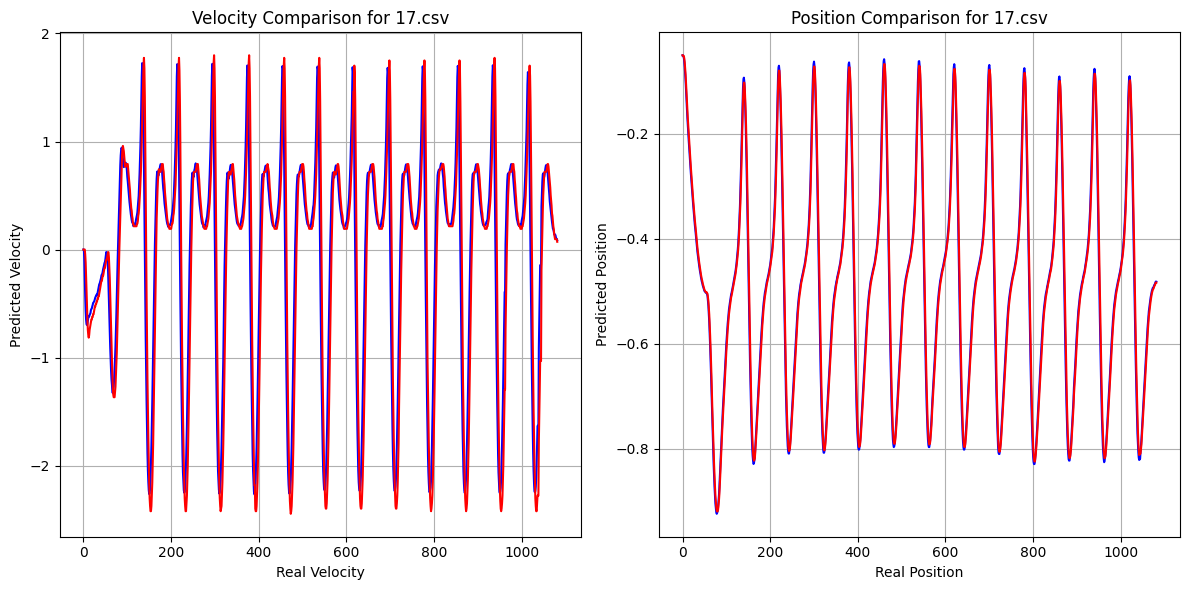

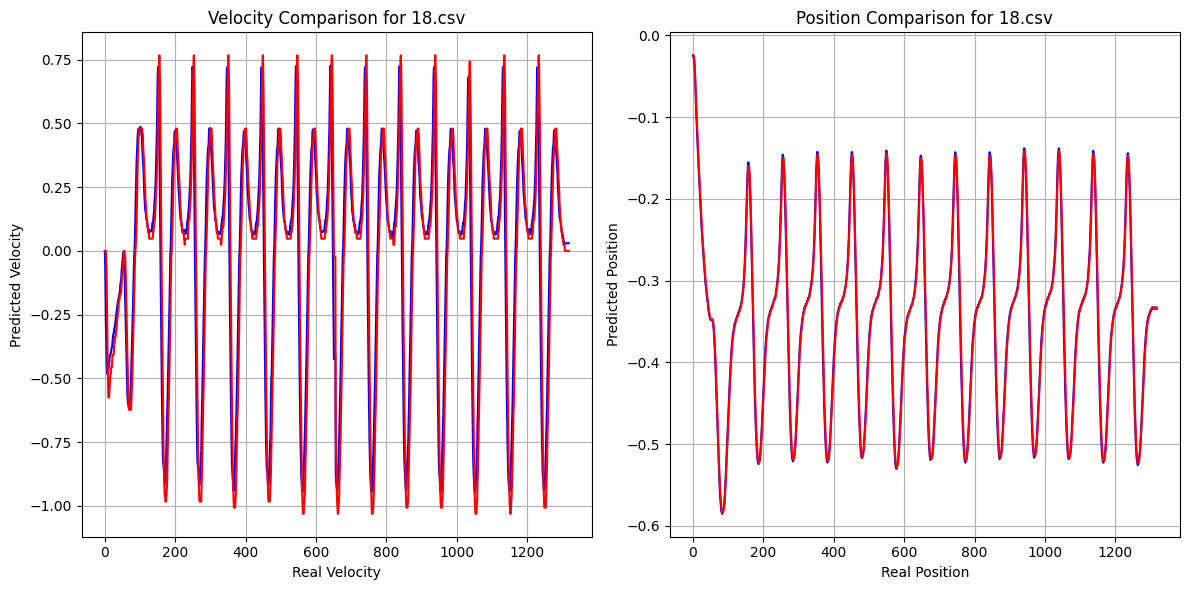

In [10]:
# Loop through each file name
for filename in filenames:
    # Construct full paths to the reference and prediction files
    ref_path = os.path.join(ref_dir, filename)
    pred_path = os.path.join(pred_dir, filename)
    
    # Read the data from CSV files
    ref_data = pd.read_csv(ref_path)
    pred_data = pd.read_csv(pred_path)
    
    # Prepare the data for plotting
    real_velocity = ref_data['DXL_Velocity']
    predicted_velocity = pred_data['predicted_velocity']
    real_position = ref_data['θ(t)']
    predicted_position = pred_data['predicted_position']

    # Create plots for velocity and position
    plt.figure(figsize=(12, 6))
    
    # Plot for velocity
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.plot(predicted_velocity, color='blue')
    plt.plot(real_velocity, color='red')
    plt.xlabel('Real Velocity')
    plt.ylabel('Predicted Velocity')
    plt.title(f'Velocity Comparison for {filename}')
    plt.grid(True)

    # Plot for position
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    # plt.scatter(real_position, predicted_position, color='green', alpha=0.5, s=1)
    plt.plot(predicted_position, color='blue')
    plt.plot(real_position, color='red')
    plt.xlabel('Real Position')
    plt.ylabel('Predicted Position')
    plt.title(f'Position Comparison for {filename}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

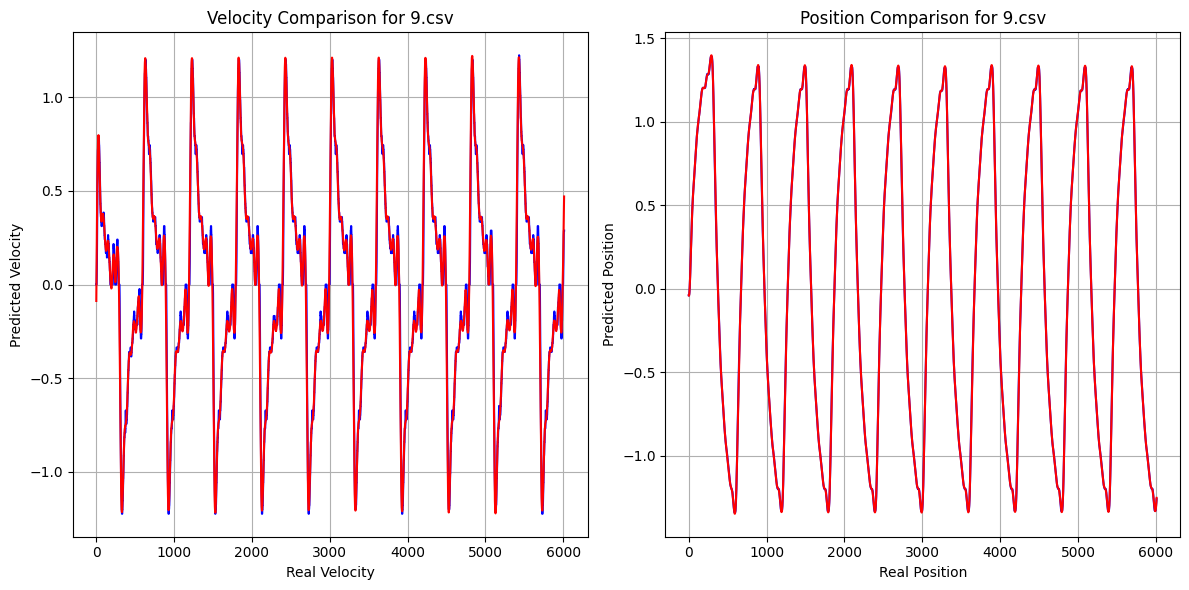

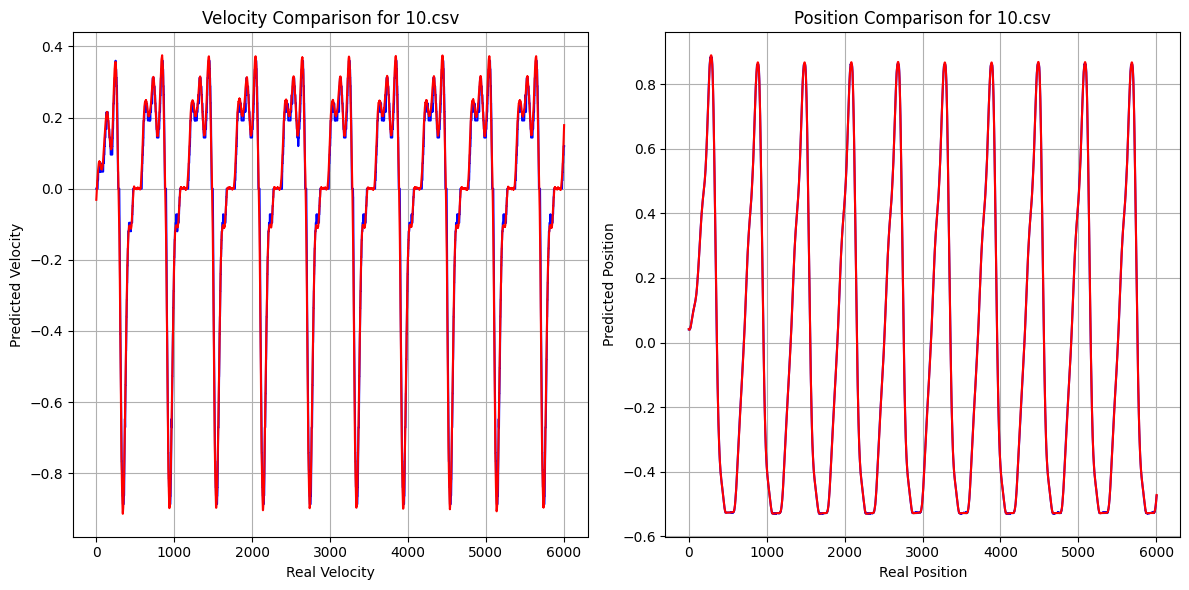

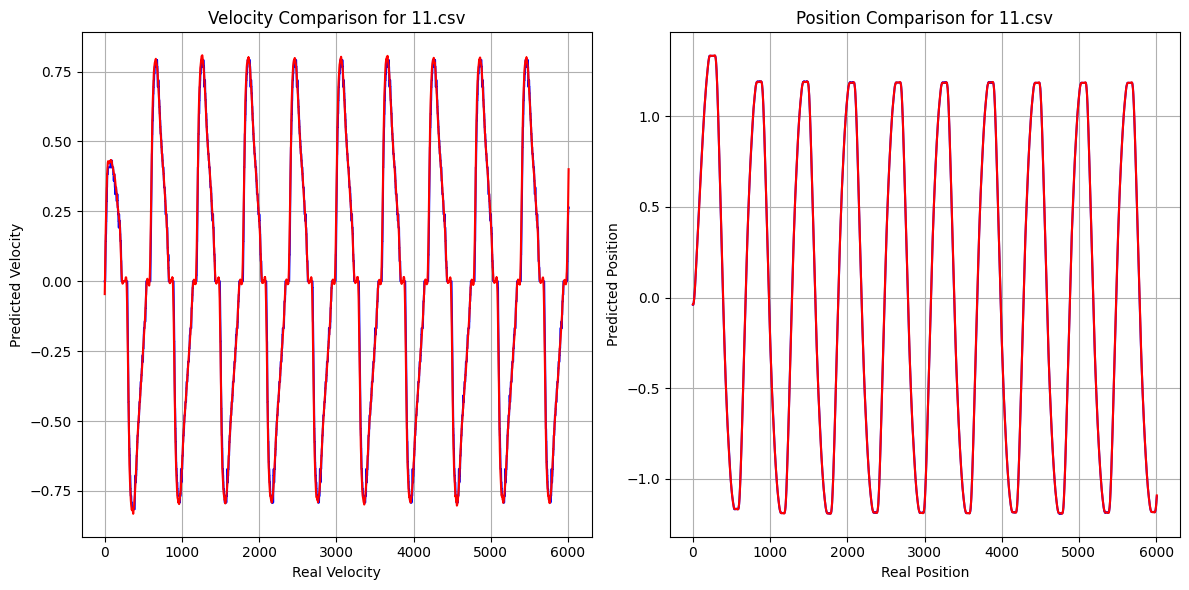

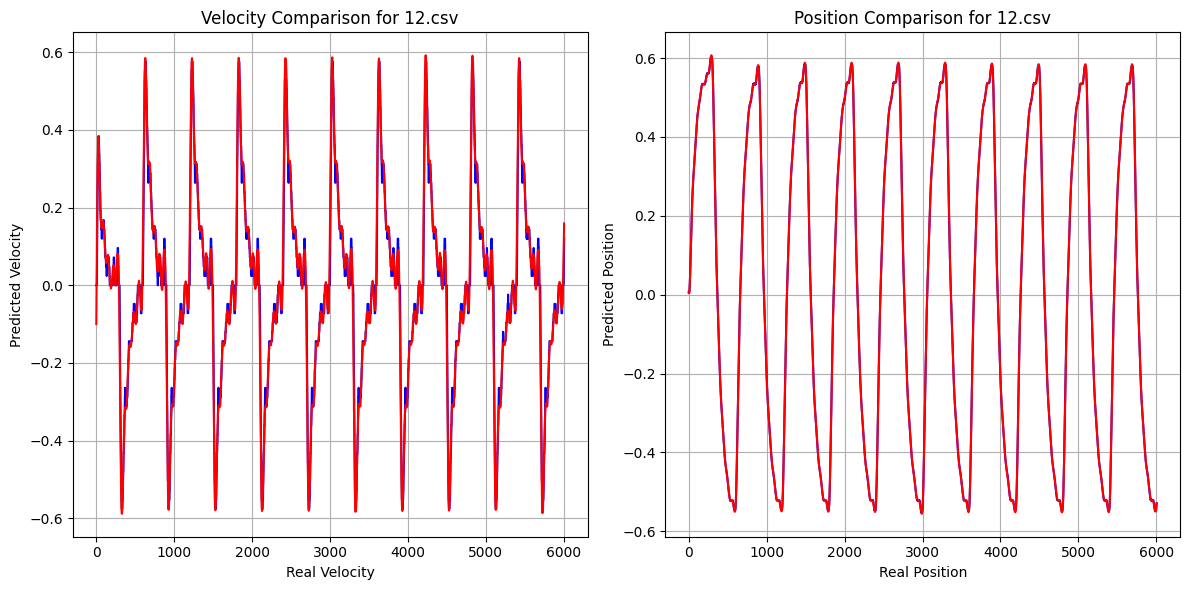

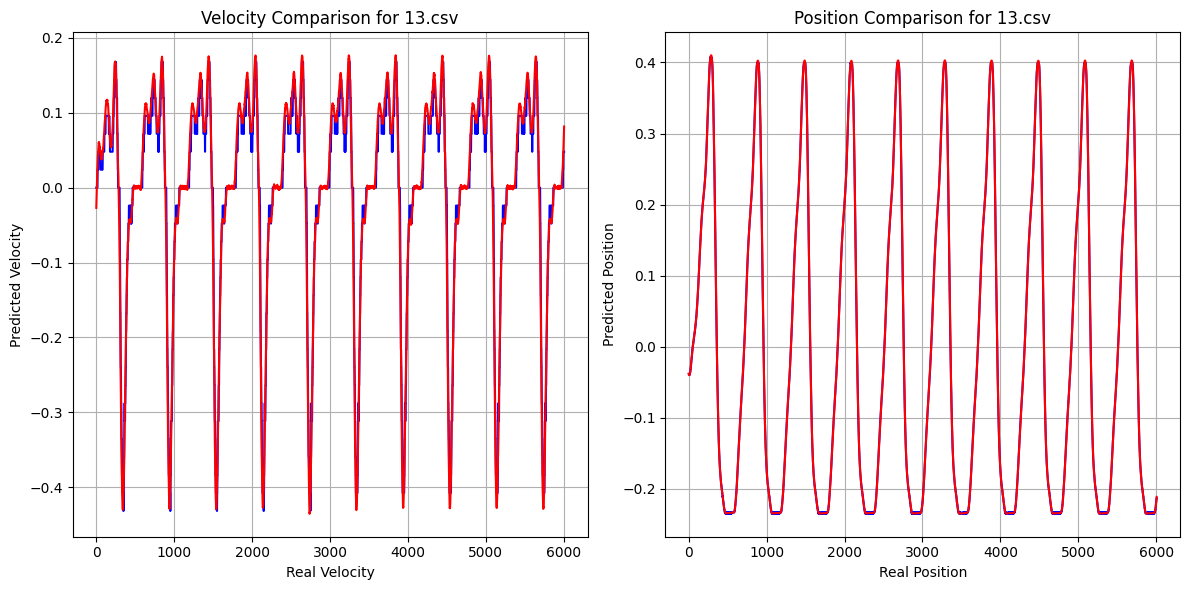

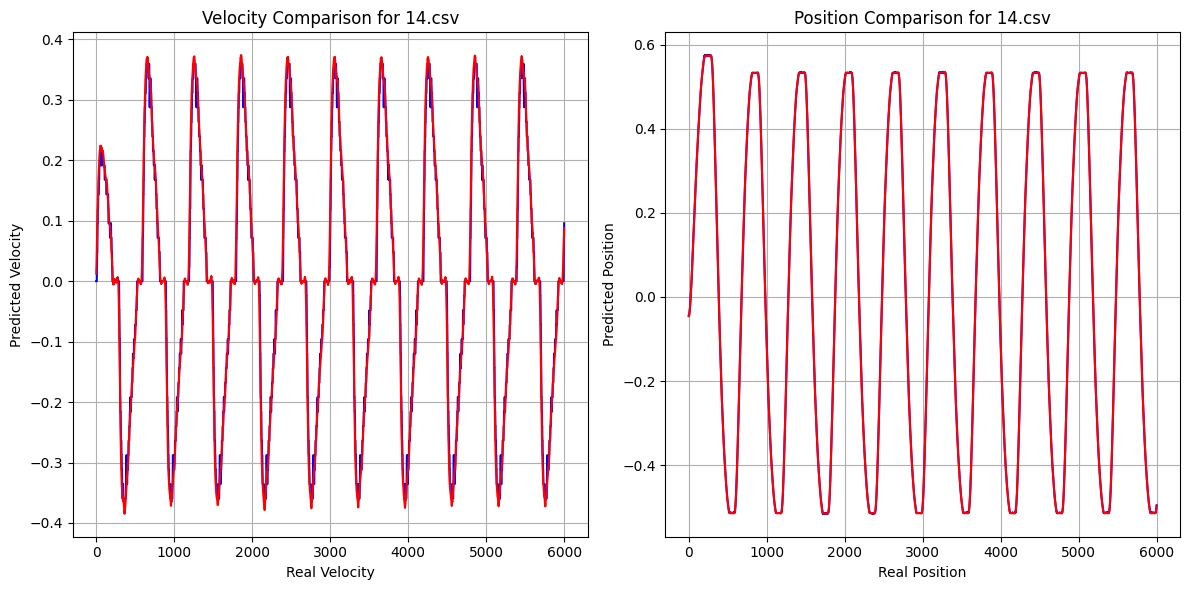

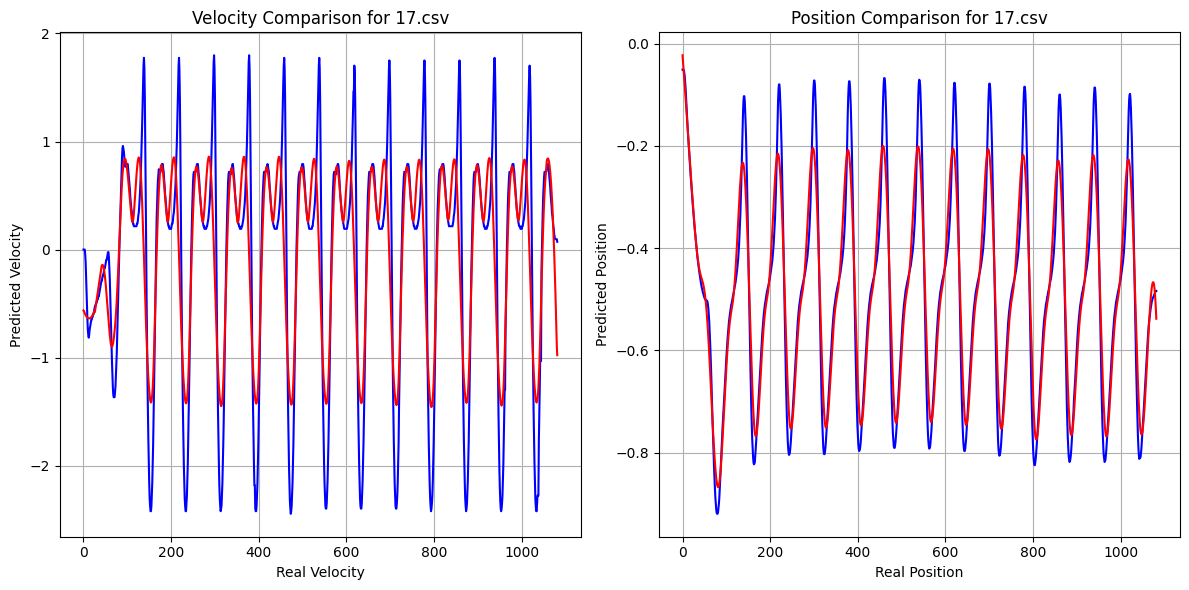

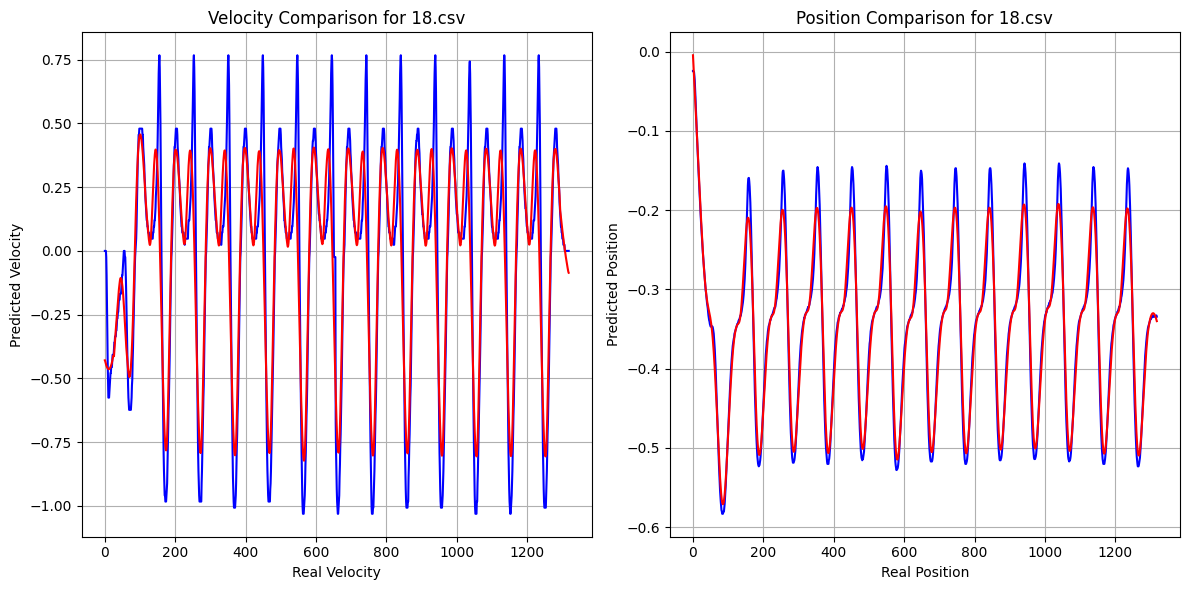

In [14]:
from scipy.signal import savgol_filter
# Loop through each file name
for filename in filenames:
    # Construct full paths to the reference and prediction files
    ref_path = os.path.join(ref_dir, filename)
    pred_path = os.path.join(pred_dir, filename)
    
    # Read the data from CSV files
    ref_data = pd.read_csv(ref_path)
    pred_data = pd.read_csv(pred_path)
    
    # Apply Savitzky-Golay filter to smooth the position data
    # Window size 51 and polynomial order 3 are common choices but may need adjustment
    window_length, poly_order = 51, 3
    # Ensure window length is less than the number of data points and is an odd number
    if window_length > len(ref_data['θ(t)']) or window_length % 2 == 0:
        window_length = min(len(ref_data['θ(t)']) - 1, window_length)
        if window_length % 2 == 0:
            window_length += 1
    position_smoothed = savgol_filter(ref_data['θ(t)'], window_length, poly_order)
    
    # Calculate velocity from smoothed position data
    timestamps = ref_data['timestamp']
    velocity_from_smoothed_position = np.gradient(position_smoothed, timestamps)

    # Prepare the data for plotting
    predicted_velocity = pred_data['predicted_velocity']
    real_velocity = ref_data['DXL_Velocity']
    real_position = ref_data['θ(t)']

    # Create plots for velocity and position
    plt.figure(figsize=(12, 6))
    
    # Plot for velocity
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.plot(real_velocity, color='blue')
    plt.plot(velocity_from_smoothed_position, color='red')
    plt.xlabel('Real Velocity')
    plt.ylabel('Predicted Velocity')
    plt.title(f'Velocity Comparison for {filename}')
    plt.grid(True)

    # Plot for position
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    # plt.scatter(real_position, predicted_position, color='green', alpha=0.5, s=1)
    plt.plot(real_position, color='blue')
    plt.plot(position_smoothed, color='red')
    plt.xlabel('Real Position')
    plt.ylabel('Predicted Position')
    plt.title(f'Position Comparison for {filename}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()